In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import warnings



In [4]:
# Fetching data

df = pd.read_csv('Admission_Prediction.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [5]:
# Checking the shape of data (rows and columns)

df.shape

(500, 9)

In [6]:
# Checking data type 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [7]:
# With this we are able to check several things lie (Mean, std, outliers etc)

df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


I have checked and found there are some NAN in persent in data (GRE Score, TOEFL Score, University Rating), however I have not found any Outliers as per the data so box plot is not required in this case.


In [8]:
# We have used mean to fill NAN  for continous data and mode for discret data

df['GRE Score'] = df['GRE Score'].fillna(df['GRE Score'].mean())
df['TOEFL Score'] = df['TOEFL Score'].fillna(df['TOEFL Score'].mean())
df['University Rating'] = df['University Rating'].fillna(df['University Rating'].mode()[0])

In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [10]:
#Now we are removing serial no feature as this has no use in our dataset

df = df.drop(columns=['Serial No.'])
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

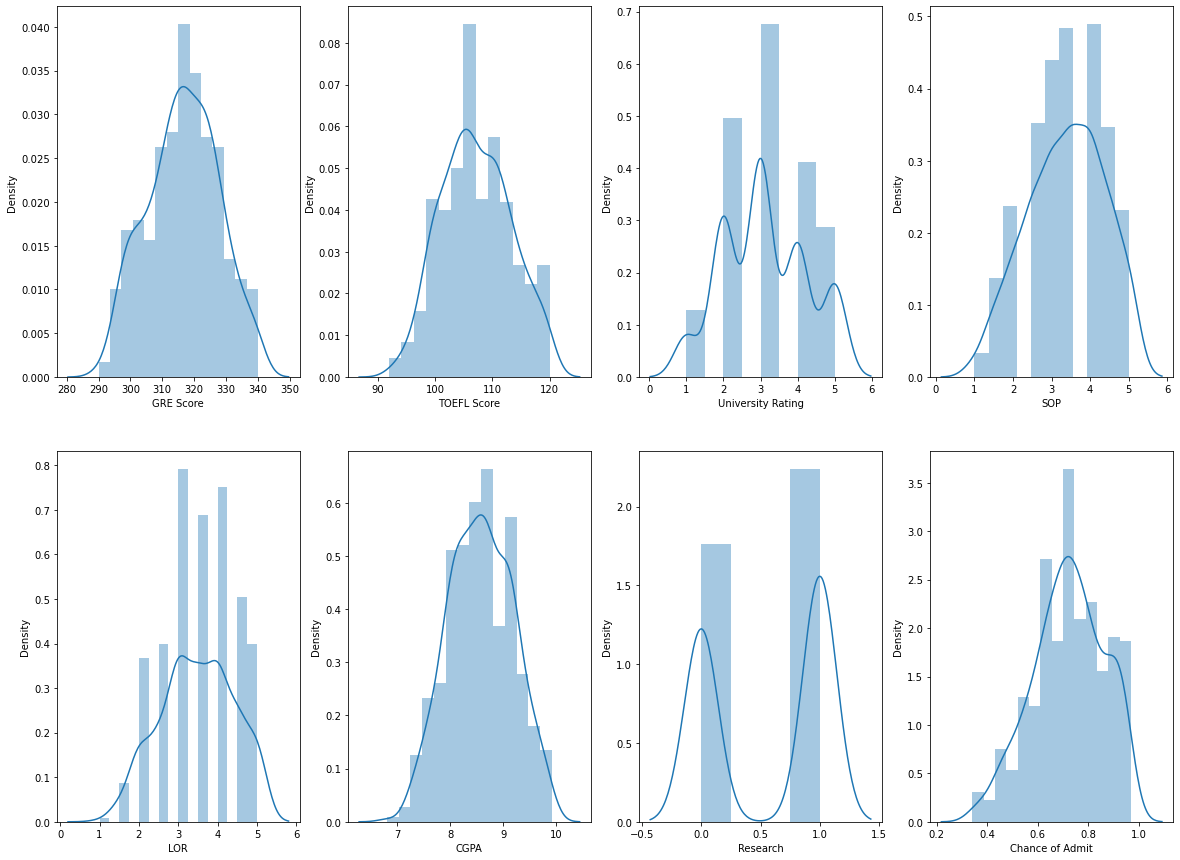

In [11]:
# Now we are checking distribution of data (weather it is normally distibuted or not)

plt.figure(figsize =(20,15))
plotnumber =1

for column in df:
    if plotnumber<=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1
    
plt.show()    
    

# Data distibution is looking good. Now we can move forward

In [12]:
# Now we are seprating features and label
x = df.drop(columns=['Chance of Admit'])
y = df['Chance of Admit']

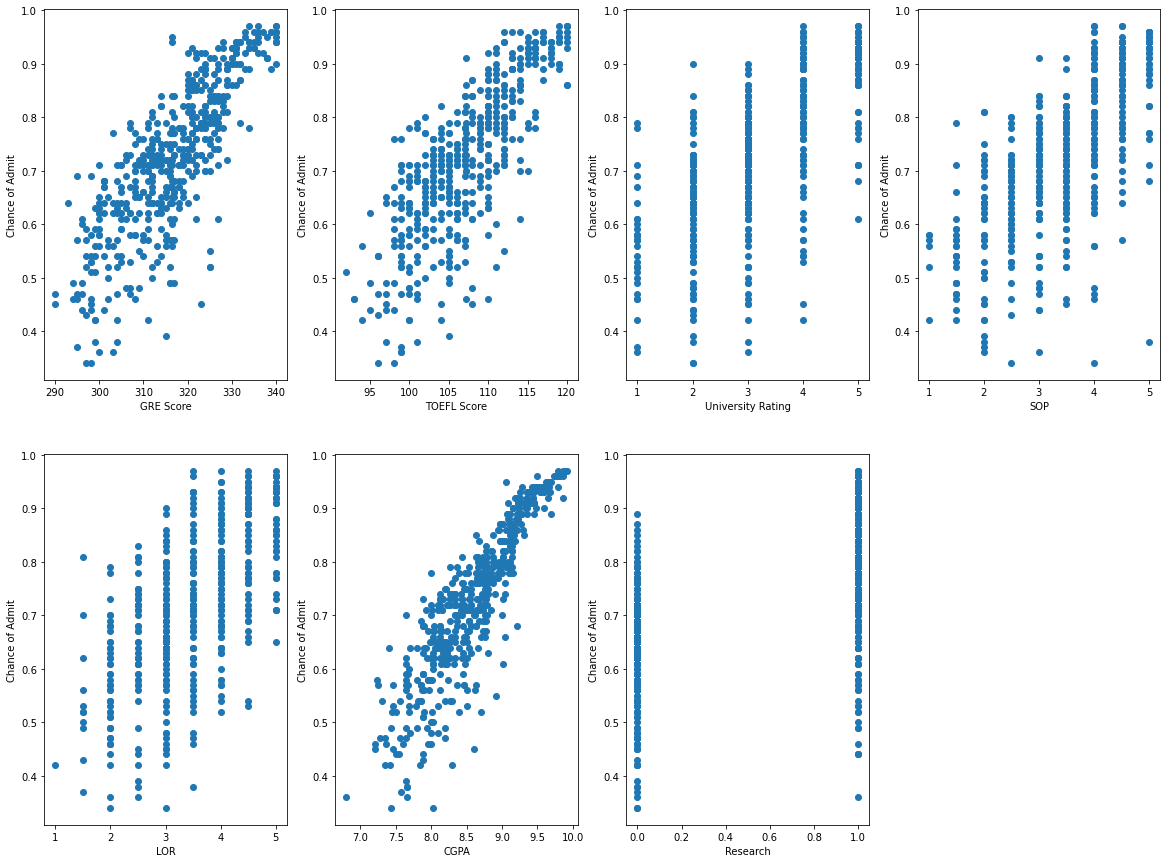

In [13]:
# Now we are checking relationship between features and label

plt.figure(figsize=(20,15))
plotnumber = 1

for column in x:
    if plotnumber <=7:
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('Chance of Admit')
    plotnumber+=1
    
plt.show()    

We can say that there is a positive relationship between features and label

In [14]:
# Now we can standardize the data using Standard Scaler

scaled = StandardScaler()

x_scaled = scaled.fit_transform(x)

# To check the multicollinearity probem we have used VIF method

In [15]:
x_scaled.shape[1]

7

In [18]:
vif = pd.DataFrame()
vif['Vif'] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['features'] = x.columns
vif

,Vif,features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


As per the result of VIF test we have found there is not multicollinearity problem in the features as all are below 5.

In [13]:
# Once the data is scaled we can train our datset using train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20, random_state = 324)

In [14]:
# Now we are apply ML algorithm over the train data


lm = LinearRegression()

lm.fit(x_train,y_train)

LinearRegression()

In [15]:
# checking model accurcay of train data

lm.score(x_train,y_train)

0.8243699889094269

In [16]:
# checking model accurcay of test data

lm.score(x_test,y_test)

0.8052925781322418

Let's predict the x_test (test) data to see the prediction so that we can compare with actual data

In [17]:
y_pred = lm.predict(x_test)

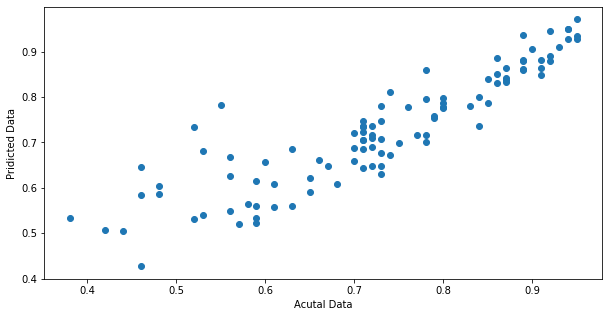

In [18]:
plt.figure(figsize = (10,5))
ax = plt.scatter(y_test,y_pred)
plt.xlabel('Acutal Data')
plt.ylabel('Pridicted Data')
plt.show()

To check how bad the model percentage is we have used below technics

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [20]:
mean_absolute_error(y_test,y_pred)

0.046167849377194994

In [21]:
mean_squared_error(y_test,y_pred)

0.00402647938955337

In [22]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.06345454585412592

# To the weather our model is overfitting we have use regularization method

In [23]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [24]:
lassocv = LassoCV(alphas=None,max_iter =1000,normalize= True)
lassocv.fit(x_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


LassoCV(normalize=True)

In [25]:
alpha = lassocv.alpha_
alpha

3.312704505837531e-05

In [26]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.312704505837531e-05)

In [27]:
lasso_reg.score(x_test,y_test)

0.8052814170016384

Now we know that both the models will giving the same lasso and linear regression are same in terms of model condifence so we can say that our model is not overfitting